<a href="https://colab.research.google.com/github/ParishaKB/ML/blob/master/Experiment_7/Experiment_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

Wine Dataset

In [4]:
wine = load_wine()
x_load_wine = wine.data
y_load_wine = wine.target

In [5]:
x_wine = pd.DataFrame(x_load_wine)
y_wine = pd.DataFrame(y_load_wine)
print(x_wine.shape)
print(y_wine.shape)

(178, 13)
(178, 1)


In [6]:
sc = StandardScaler()
x_wine = pd.DataFrame(sc.fit_transform(x_wine))

In [7]:
y_wine = to_categorical(y_wine)
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(142, 13) (142, 3)
(18, 13) (18, 3)
(18, 13) (18, 3)


In [8]:
nn_wine = models.Sequential()

nn_wine.add(layers.Dense(128, activation = 'relu', input_shape = (13, )))
nn_wine.add(layers.Dense(32, activation = 'relu'))
nn_wine.add(layers.Dense(3, activation = 'sigmoid'))

nn_wine.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
wine_history = nn_wine.fit(x_train, y_train, epochs = 75, validation_data = (x_dev, y_dev))

wine_dev_acc = nn_wine.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', wine_dev_acc)

Epoch 1/75
5/5 [==============================] - 0s 36ms/step - loss: 0.7330 - accuracy: 0.3028 - val_loss: 0.6920 - val_accuracy: 0.3889
Epoch 2/75
5/5 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.3099 - val_loss: 0.6813 - val_accuracy: 0.3889
Epoch 3/75
5/5 [==============================] - 0s 4ms/step - loss: 0.7110 - accuracy: 0.3099 - val_loss: 0.6713 - val_accuracy: 0.4444
Epoch 4/75
5/5 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.3239 - val_loss: 0.6617 - val_accuracy: 0.4444
Epoch 5/75
5/5 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.3521 - val_loss: 0.6525 - val_accuracy: 0.4444
Epoch 6/75
5/5 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.3732 - val_loss: 0.6438 - val_accuracy: 0.4444
Epoch 7/75
5/5 [==============================] - 0s 4ms/step - loss: 0.6724 - accuracy: 0.4014 - val_loss: 0.6353 - val_accuracy: 0.4444
Epoch 8/75
5/5 [=================

Plotting Accuracy & Validation Accuracy with Epoch

Plotting Loss & Validation Loss with Epoch

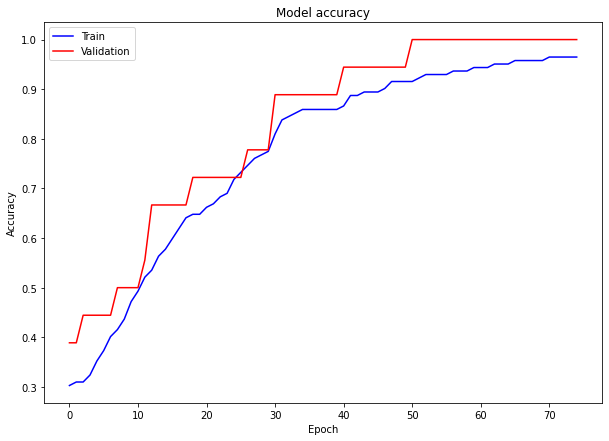

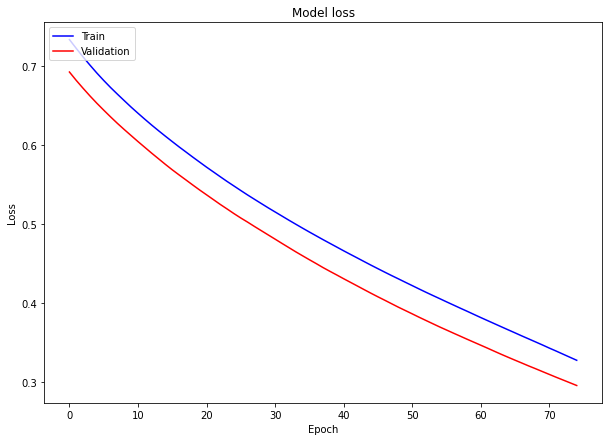

In [10]:
plt.figure(figsize = (10,7))
plt.plot(wine_history.history['accuracy'], color = 'blue')
plt.plot(wine_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(wine_history.history['loss'], color = 'blue')
plt.plot(wine_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
wine_test_acc = nn_wine.evaluate(x_test, y_test)[1]
print('The test accuracy is', wine_test_acc)

1/1 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 1.0000
The test accuracy is 1.0
